In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Objectives......**

**1.Product Distribution Insights:** Identify the most and least popular product categories (e.g., Eye Glasses, Sunglasses) to prioritize inventory and marketing efforts.

**2.Brand Performance:** Assess the market share and pricing trends for each brand, identifying leaders and underperforming brands.

**3.Customer Preferences:** Analyze size distribution to understand customer preferences and potential gaps in offerings (e.g., Medium vs. Wide sizes).

**4.Pricing Strategy Evaluation:** Uncover insights into Original Price, Price after Discount, and Discount patterns to evaluate the effectiveness of pricing strategies.

**5.Customer Ratings & Satisfaction:** Investigate customer ratings to gauge satisfaction levels, which could guide improvements in product quality or service.

**6.Pricing & Revenue Trends:** Analyze how pricing varies by category, size, and brand to uncover trends in revenue generation and pricing efficiency.

**7.Savings Opportunities:** Identify areas where customers can gain the most savings, which could help in shaping value-focused marketing strategies.

In [22]:
Lenscart_Data = pd.read_csv("Lenscart.csv")
Lenscart_Data

,Glasses,Brand,Size,Rating,Original price(₹),Discount,Offer price(₹),Savings(₹)
0,Eye Glasses,Lenskart Air,Medium,4.7,2000,0.25,1500,500
1,Eye Glasses,Lenskart Air,Medium,4.8,2000,0.25,1500,500
2,Eye Glasses,John Jacobs,Medium,4.8,4000,0.13,3500,500
3,Eye Glasses,Lenskart STUDIO,Medium,4.9,2000,0.25,1500,500
4,Eye Glasses,Vincent Chase,Narrow,4.8,2000,0.25,1500,500
...,...,...,...,...,...,...,...,...
3837,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3838,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3839,Sun Glasses,Vincent Chase,Medium,0.0,2000,NaN,1500,500
3840,Sun Glasses,Vincent Chase,Narrow,0.0,2000,NaN,1500,500


## Data Inspection

In [24]:
Lenscart_Data.isna().sum()

Glasses                 0
Brand                   0
Size                    0
Rating                  0
Original price(₹)       0
Discount             1163
Offer price(₹)          0
Savings(₹)              0
dtype: int64

In [25]:
Lenscart_Data.dtypes

Glasses               object
Brand                 object
Size                  object
Rating               float64
Original price(₹)      int64
Discount             float64
Offer price(₹)         int64
Savings(₹)             int64
dtype: object

In [26]:
Lenscart_Data.columns

Index(['Glasses', 'Brand', 'Size', 'Rating', 'Original price(₹)', 'Discount',
       'Offer price(₹)', 'Savings(₹)'],
      dtype='object')

In [27]:
Lenscart_Data.head()

,Glasses,Brand,Size,Rating,Original price(₹),Discount,Offer price(₹),Savings(₹)
0,Eye Glasses,Lenskart Air,Medium,4.7,2000,0.25,1500,500
1,Eye Glasses,Lenskart Air,Medium,4.8,2000,0.25,1500,500
2,Eye Glasses,John Jacobs,Medium,4.8,4000,0.13,3500,500
3,Eye Glasses,Lenskart STUDIO,Medium,4.9,2000,0.25,1500,500
4,Eye Glasses,Vincent Chase,Narrow,4.8,2000,0.25,1500,500


In [28]:
Lenscart_Data.describe()

,Rating,Original price(₹),Discount,Offer price(₹),Savings(₹)
count,3842.000000,3842.000000,2679.000000,3842.000000,3842.000000
mean,3.582119,2610.879750,0.264476,1987.610619,623.269131
std,2.086321,1267.395514,0.124998,1159.250207,328.059365
min,0.000000,1000.000000,0.070000,500.000000,400.000000
25%,0.000000,2000.000000,0.200000,1500.000000,500.000000
50%,4.800000,2000.000000,0.250000,1500.000000,500.000000
75%,4.900000,3000.000000,0.250000,2500.000000,500.000000
max,5.000000,7000.000000,0.600000,6500.000000,3000.000000


In [29]:
Lenscart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Glasses            3842 non-null   object 
 1   Brand              3842 non-null   object 
 2   Size               3842 non-null   object 
 3   Rating             3842 non-null   float64
 4   Original price(₹)  3842 non-null   int64  
 5   Discount           2679 non-null   float64
 6   Offer price(₹)     3842 non-null   int64  
 7   Savings(₹)         3842 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 240.3+ KB


## **Data Cleaning ........!**

### Steps for Data Cleaning......

**1. Understand the Dataset**

**2. Handle Missing Data**
  
* Check for Missing Values:Identify any NaN or blank fields in columns.

In [31]:
Lenscart_Data.isna().sum()

Glasses                 0
Brand                   0
Size                    0
Rating                  0
Original price(₹)       0
Discount             1163
Offer price(₹)          0
Savings(₹)              0
dtype: int64

**There are no null values in the dataset**

**3. Remove Duplicates**


* Check for duplicate rows using duplicated().

In [34]:
Lenscart_Data.duplicated().sum()

2603

**Even though there are duplicate values in the dataset, dropping them would compromise the relevance of the data concerning its associated columns. These duplicate values are meaningful and valid for the analysis.**

**4. Handle Irrelevant Data**

* Drop unnecessary columns if any, such as metadata or columns irrelevant to analysis.

In [37]:
Lenscart_Data

,Glasses,Brand,Size,Rating,Original price(₹),Discount,Offer price(₹),Savings(₹)
0,Eye Glasses,Lenskart Air,Medium,4.7,2000,0.25,1500,500
1,Eye Glasses,Lenskart Air,Medium,4.8,2000,0.25,1500,500
2,Eye Glasses,John Jacobs,Medium,4.8,4000,0.13,3500,500
3,Eye Glasses,Lenskart STUDIO,Medium,4.9,2000,0.25,1500,500
4,Eye Glasses,Vincent Chase,Narrow,4.8,2000,0.25,1500,500
...,...,...,...,...,...,...,...,...
3837,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3838,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3839,Sun Glasses,Vincent Chase,Medium,0.0,2000,NaN,1500,500
3840,Sun Glasses,Vincent Chase,Narrow,0.0,2000,NaN,1500,500


**All columns in the dataset are relevant and essential for data analysis, as each provides valuable information necessary for a comprehensive understanding of the data.**

## **5. Address Outliers / Outlier Detection**

In [40]:
Lenscart_Data.columns

Index(['Glasses', 'Brand', 'Size', 'Rating', 'Original price(₹)', 'Discount',
       'Offer price(₹)', 'Savings(₹)'],
      dtype='object')

Text(0.5, 1.0, 'Outlier Detection')

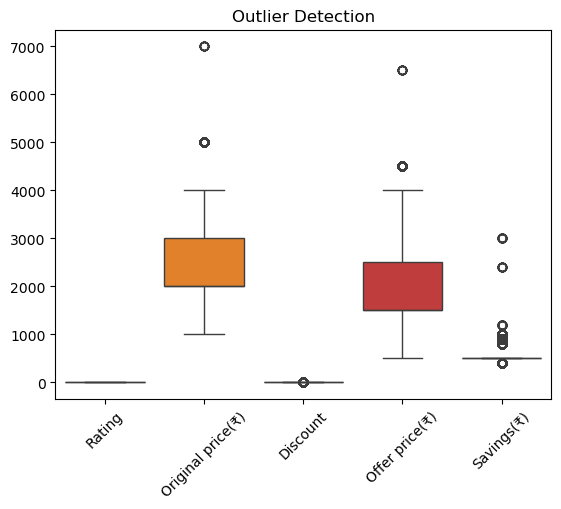

In [41]:
sns.boxplot(Lenscart_Data)
plt.xticks(rotation = 45)
plt.title("Outlier Detection")

**The dataset contains some outliers, primarily in price variations, which are expected due to differences in products and brands. These outliers are meaningful and provide valuable insights, making them essential for data analysis rather than being excluded.**

## DATA VISUALIZATION............!

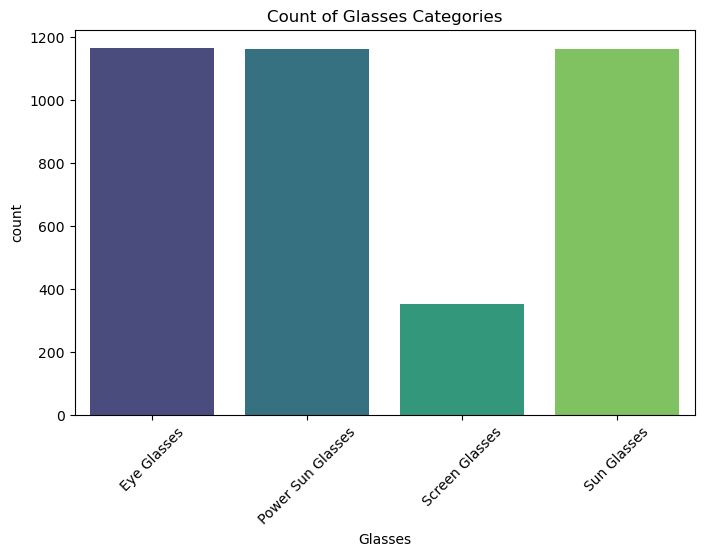

In [44]:
# Bar Chart: Count of Glasses Categories
plt.figure(figsize=(8, 5))
sns.countplot(data=Lenscart_Data, x='Glasses', palette='viridis')
plt.title("Count of Glasses Categories")
plt.xticks(rotation=45)
plt.show()

**Eye Glasses and Power Sun Glasses lead the way:** Both these categories have counts close to 1200, making them the most popular choices.

**Sun Glasses also shine brightly:** Their count is just slightly below 1200, indicating a high preference among users.

**Screen Glasses lag behind:** This category has the lowest count, around 400, significantly lower than the others.

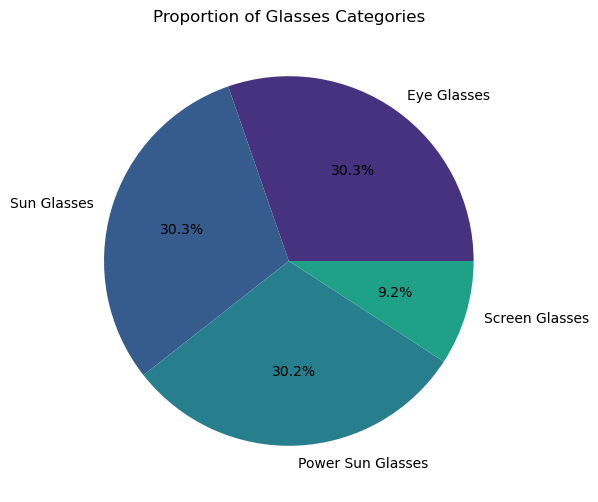

In [46]:
# Pie Chart: Proportion of Glasses Categories
Lenscart_Data['Glasses'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=sns.color_palette('viridis'))
plt.title("Proportion of Glasses Categories")
plt.ylabel('')
plt.show()

* **high demand for traditional and power sun glasses, with screen glasses being significantly less popular.**

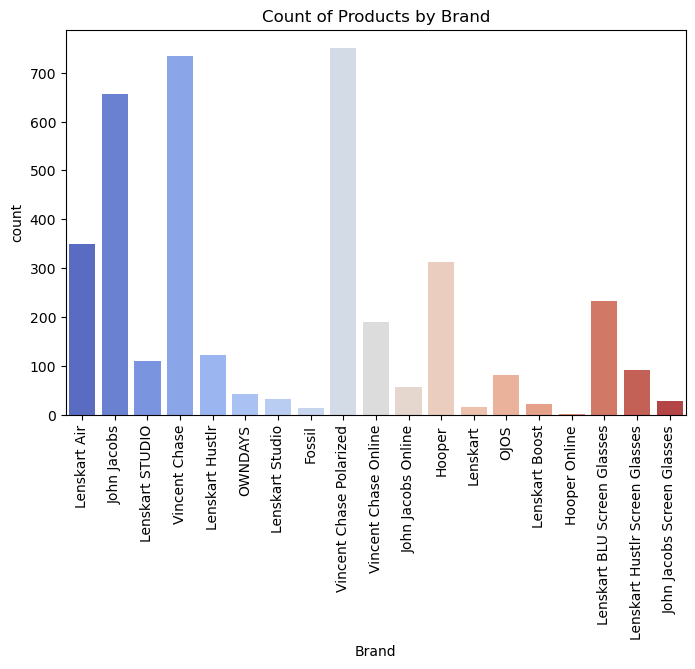

In [48]:
# Count of Products by Brand
plt.figure(figsize=(8, 5))
sns.countplot(data=Lenscart_Data, x='Brand', palette='coolwarm')
plt.title("Count of Products by Brand")
plt.xticks(rotation=90)
plt.show()

* **Brand Dominance:** **Vincent Chase** and **John Jacobs** are the **top brands**, showing strong customer preference.

* **The presence of various brands like Fossil, Lenskart Boost, and Hooper indicates a competitive market with varied choices for consumers.**

* **Brand Opportunity:** Lower counts for certain brands highlight potential growth opportunities, suggesting these brands could benefit from targeted marketing strategies.

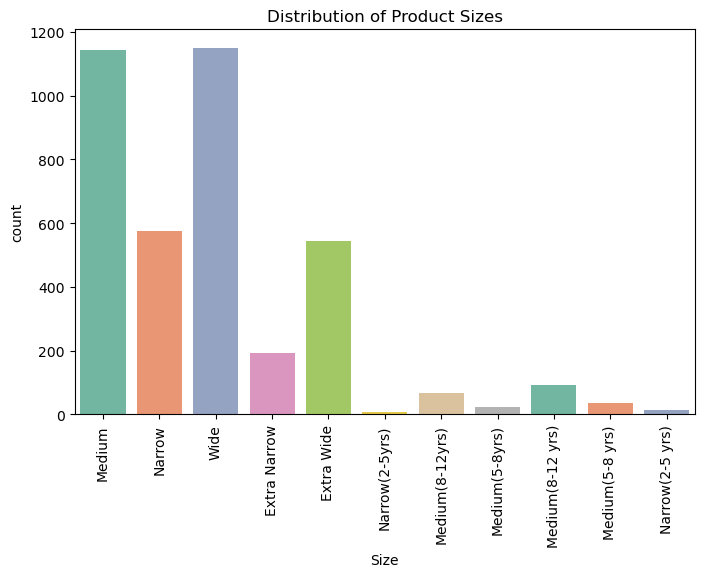

In [50]:
# Bar Chart: Distribution of Product Sizes
plt.figure(figsize=(8, 5))
sns.countplot(data=Lenscart_Data, x='Size', palette='Set2')
plt.title("Distribution of Product Sizes")
plt.xticks(rotation=90)
plt.show()

* **Dominance of Medium and Wide Sizes:** These sizes are by far the most popular, each nearing a count of 1200.

* **Extra Narrow size has significantly lower demand, with a count around 200.**

* **Minimal Interest in Age-Specific Sizes:** Sizes specific to children (e.g., Narrow 2-5 yrs, Medium 8-12 yrs, Medium 5-8 yrs) have very low counts, with some nearly negligible.

In [52]:
Lenscart_Data

,Glasses,Brand,Size,Rating,Original price(₹),Discount,Offer price(₹),Savings(₹)
0,Eye Glasses,Lenskart Air,Medium,4.7,2000,0.25,1500,500
1,Eye Glasses,Lenskart Air,Medium,4.8,2000,0.25,1500,500
2,Eye Glasses,John Jacobs,Medium,4.8,4000,0.13,3500,500
3,Eye Glasses,Lenskart STUDIO,Medium,4.9,2000,0.25,1500,500
4,Eye Glasses,Vincent Chase,Narrow,4.8,2000,0.25,1500,500
...,...,...,...,...,...,...,...,...
3837,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3838,Sun Glasses,Vincent Chase,Wide,0.0,2000,NaN,1500,500
3839,Sun Glasses,Vincent Chase,Medium,0.0,2000,NaN,1500,500
3840,Sun Glasses,Vincent Chase,Narrow,0.0,2000,NaN,1500,500


## Bi-Variate Analysis

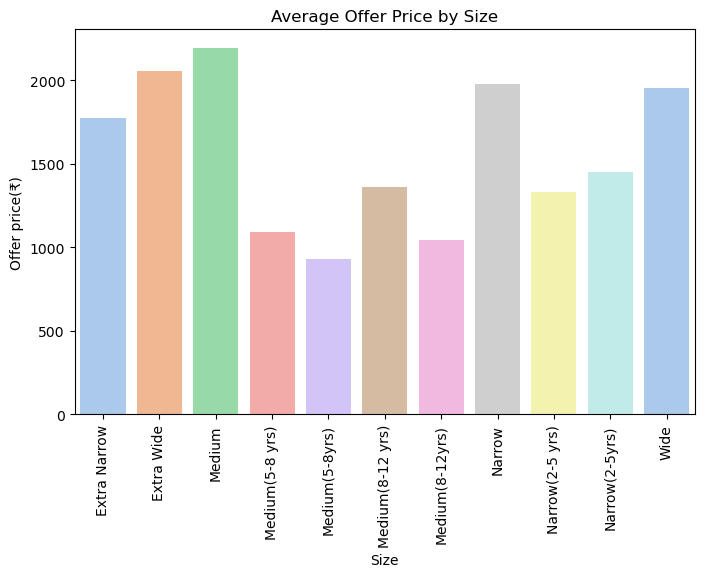

In [54]:
# Average Discounted Price by Size
avg_price_by_size = Lenscart_Data.groupby('Size')['Offer price(₹)'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_size, x='Size', y='Offer price(₹)', palette='pastel')
plt.title("Average Offer Price by Size")
plt.xticks(rotation = 90)
plt.show()

* **Highest Prices:** Medium and Extra Wide sizes have the highest average offer prices, both exceeding ₹2000.

* **Lowest Prices:** Medium (5-8 yrs) and Medium (8-12 yrs) sizes have the lowest average offer prices, both below ₹1000.


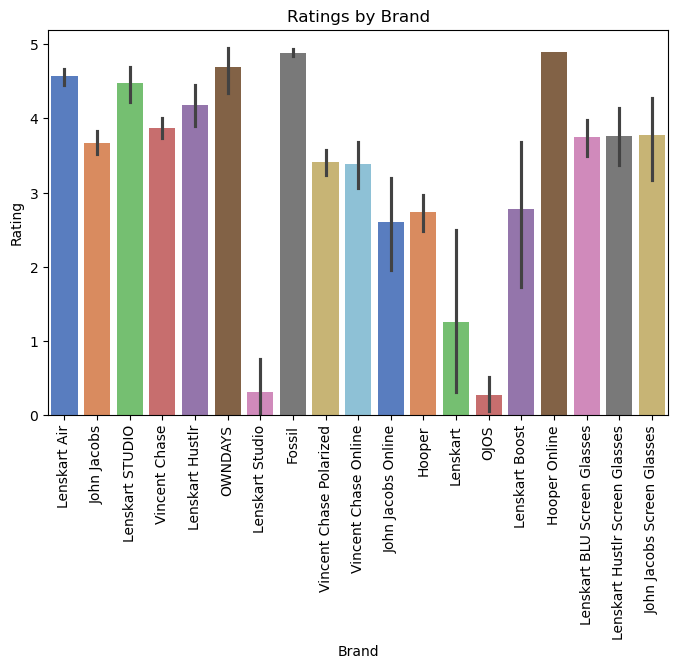

In [56]:
# Ratings by Brand
plt.figure(figsize=(8, 5))
sns.barplot(data=Lenscart_Data, x='Brand', y='Rating', palette='muted')
plt.title("Ratings by Brand")
plt.xticks(rotation=90)
plt.show()


* **Underperformers:** "Lenskart Studio" has the lowest rating, nearly 0, indicating low customer satisfaction.

* **Consistent Quality:** Brands like "Lenskart Air," "John Jacobs," "Vincent Chase," and "OWNDAYS" maintain high ratings, all above 4.

* **High Variability:** Models like "Hooper" and "Lenskart Hustlr" show significant variability in ratings, indicating mixed customer experiences.

* **Low Ratings:** Models like "Hooper Online" and "Lenskart BLU Screen Glasses" receive relatively low ratings, around 1 to 2.

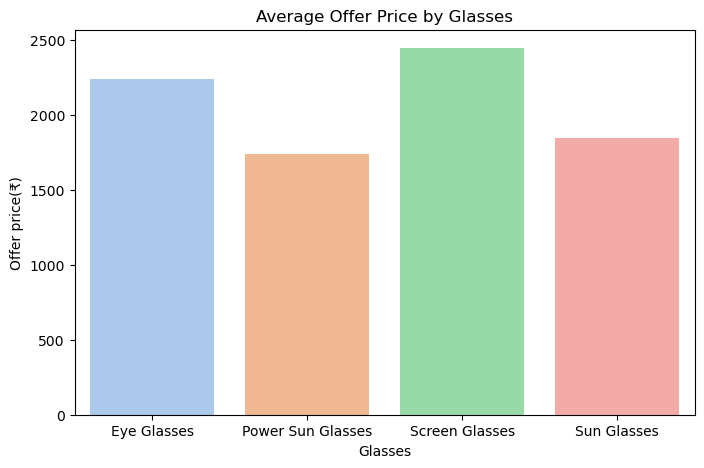

In [58]:
# Average Discounted Price by Size
avg_price_by_size = Lenscart_Data.groupby('Glasses')['Offer price(₹)'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_size, x='Glasses', y='Offer price(₹)', palette='pastel')
plt.title("Average Offer Price by Glasses")
plt.xticks(rotation = 0)
plt.show()

## 3.Multi-Variate Analysis

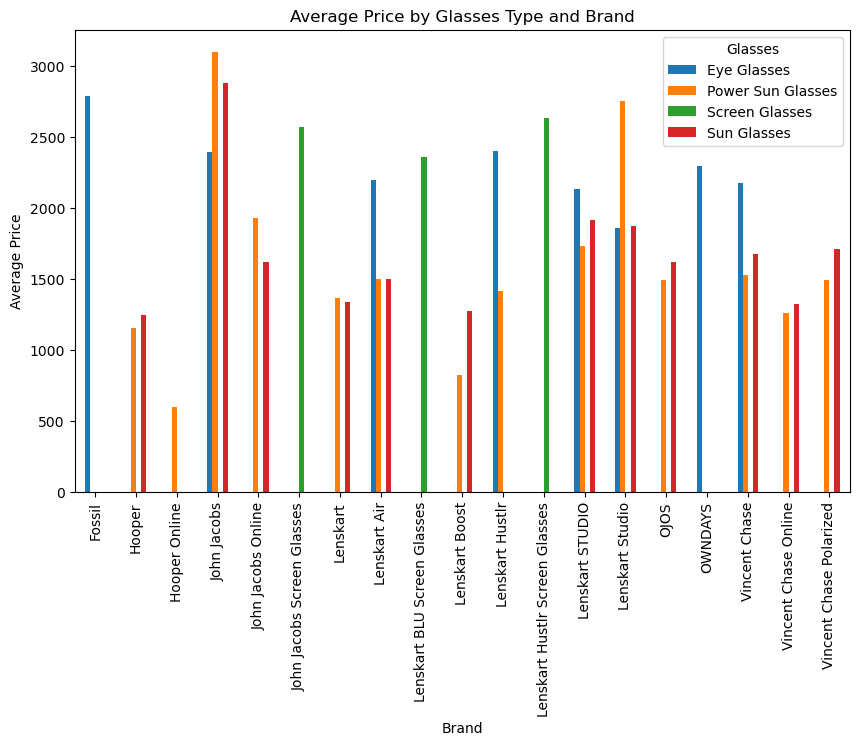

In [60]:
# Average Price by Glasses Type and Brand
avg_price = Lenscart_Data.groupby(['Brand', 'Glasses'])['Offer price(₹)'].mean().unstack()
avg_price.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price by Glasses Type and Brand")
plt.ylabel("Average Price")
plt.show()

* **Premium Pricing for Fossil:** Fossil Eye Glasses and Sun Glasses have the highest average prices, both exceeding ₹3000.

* **Competitive Pricing by Vincent Chase and John Jacobs:** These brands offer Eye Glasses and Sun Glasses at relatively lower prices, around ₹1500-₹2000.

* **Affordable Options from Lenskart:** Lenskart, including its sub-brands like Lenskart Air and Lenskart Boost, maintains average prices below ₹1500 across all glasses types.

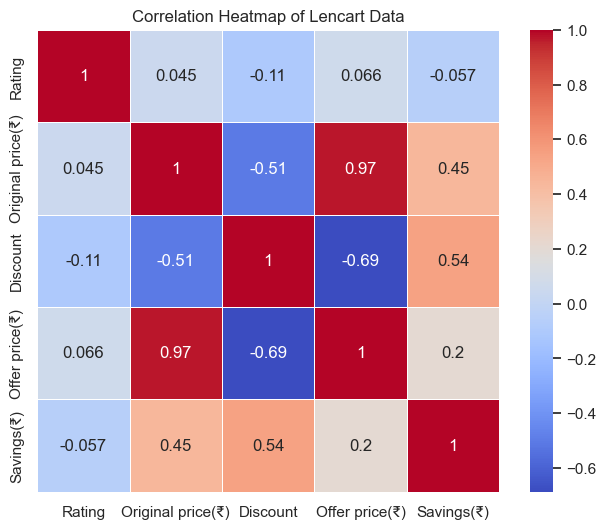

In [99]:
sns.set(style="whitegrid")  # Setting a clean grid style
plt.figure(figsize=(8, 6))  # Adjusting the figure size

heatmap = sns.heatmap(
    Lenscart_Data.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",  # Adding a colormap
    linewidths=0.5,   # Adding grid lines between cells
    square=True       # Making cells square for better aesthetics
)

plt.title("Correlation Heatmap of Lencart Data")

plt.show()


**Rating** has a weak correlation with other variables.

**Original price (₹)** strongly correlates with Offer price (₹).

**Discount** shows a moderate negative correlation with Original price (₹) and Offer price (₹).

**Savings (₹)** has a moderate positive correlation with Discount.

**Offer price (₹)** has a weak positive correlation with Savings (₹).